<a href="https://colab.research.google.com/github/antoniosMavridis/Banknote_Authentication/blob/master/Banknote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import the Libraries**

In [ ]:
#Load the Libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from pickle import dump
from pickle import load
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#**Load the Dataset**


In [ ]:
#Loading the Dataset
path = "sample_data/data_banknote_authentication.txt"
col_names = ["Variance","Skewness","Curtosis","Entropy","Class"]
df = pd.read_csv(path,sep=",", header=None, names = col_names)

#**Summarizing the Dataset**

In [ ]:
#Shape
print(df.shape)

(1372, 5)


In [ ]:
#Head
print(df.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
#Tail
print(df.tail())

      Variance  Skewness  Curtosis  Entropy  Class
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1


In [ ]:
print(df.describe())

          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


#**Visualization**

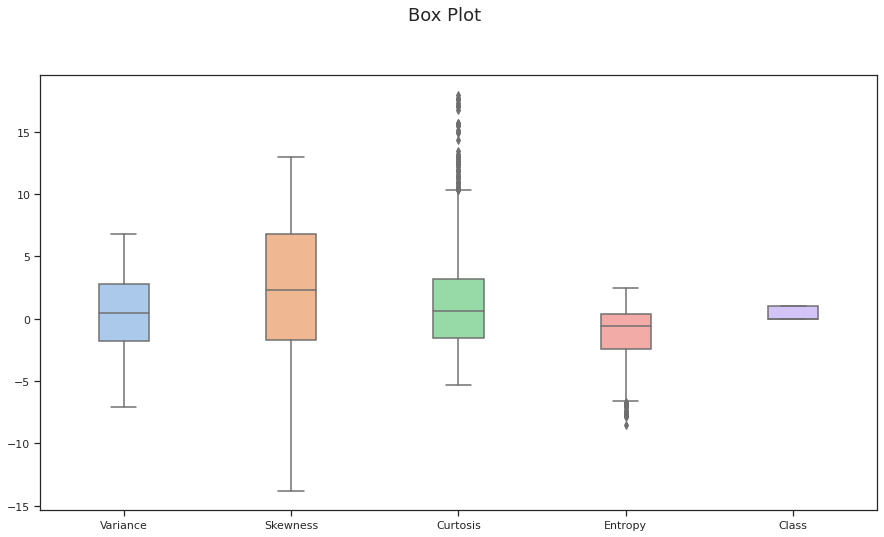

In [ ]:
#Box and whisker plots
sns.set(style="ticks")
plt.figure(figsize=(15,8))
sns.boxplot(data=df, width=0.3, palette="pastel")
plt.suptitle("Box Plot",y=1,fontsize=18)
plt.show()

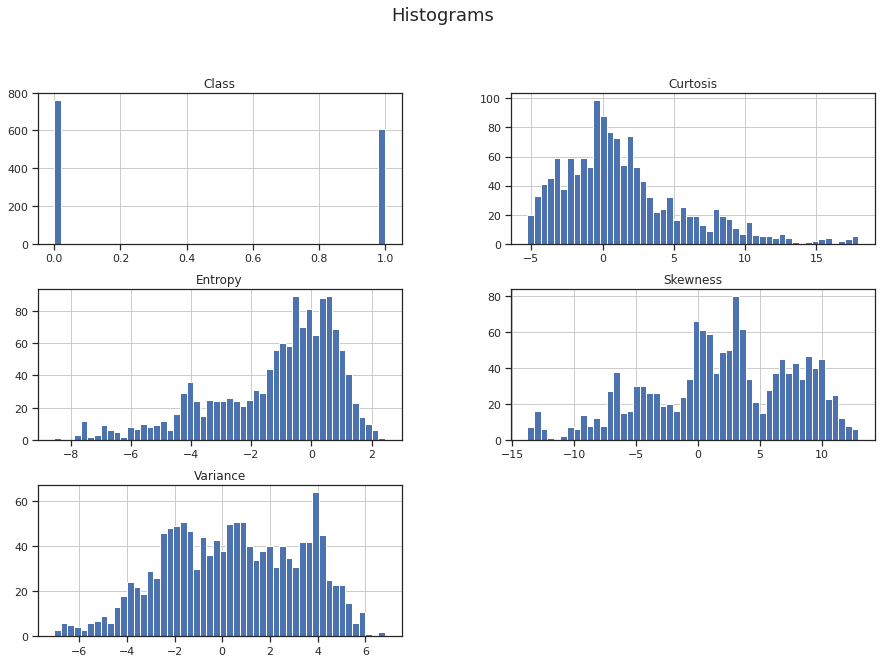

In [ ]:
#Histograms
df.hist(bins=50, figsize=(15,10))
plt.suptitle("Histograms",y=1,fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


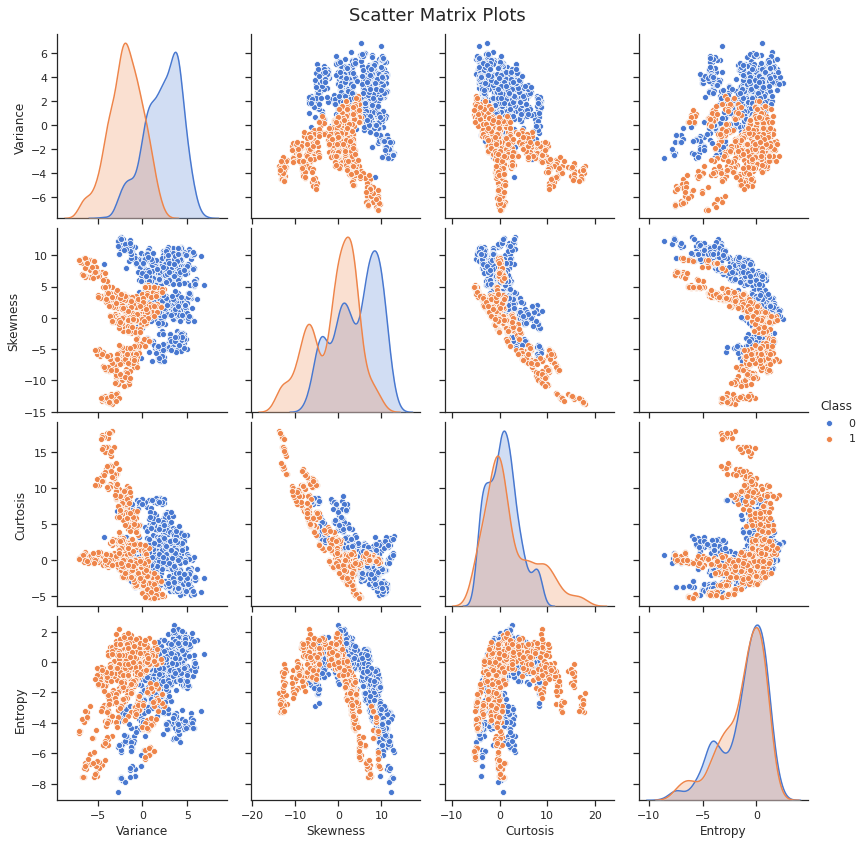

In [ ]:
#Scatter plot matrix - Correlation matrix
sns.set(style="ticks")
sns.pairplot(data=df, hue="Class",palette="muted",size=2.8)
plt.suptitle("Scatter Matrix Plots",y=1.03,fontsize=18)
plt.show()

#**Standarizing the Dataset**


In [ ]:
#Standarizing the Dataset

array = df.values
#separate array into input and output components
X = array[:,0:4]
Y = array[:,4]

#scaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.fit_transform(X)

#summarize transformed data
set_printoptions(precision=3) #These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
print(rescaledX[0:5,:])

[[ 1.122  1.149 -0.976  0.355]
 [ 1.447  1.064 -0.895 -0.129]
 [ 1.208 -0.777  0.122  0.618]
 [ 1.064  1.295 -1.255 -1.144]
 [-0.037 -1.087  0.737  0.097]]


#**Evaluate some Algorithms**

In [ ]:
#Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)
print ("X_train.shape: ",X_train.shape)
print ("X_validation.shape: ",X_validation.shape)
print ("Y_train.shape: ",Y_train.shape)
print ("Y_validation.shape: ",Y_validation.shape)

X_train.shape:  (1097, 4)
X_validation.shape:  (275, 4)
Y_train.shape:  (1097,)
Y_validation.shape:  (275,)


#**Compare Machine Learning Algorithms**

##Cross Validation - Spot Checking

In [ ]:
#Spot-Check Algorithms
models = []
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print(f"{name} = {cv_results.mean()} ({cv_results.std()})")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR = 0.9917931609674729 (0.006367324476682486)
LDA = 0.9762635529608007 (0.013117927193593398)
KNN = 1.0 (0.0)
CART = 0.9835863219349459 (0.008934838001428034)
NB = 0.8413177648040033 (0.04946885351998102)
SVM = 0.9954378648874063 (0.0061357567890890875)


##Compare Algorithms

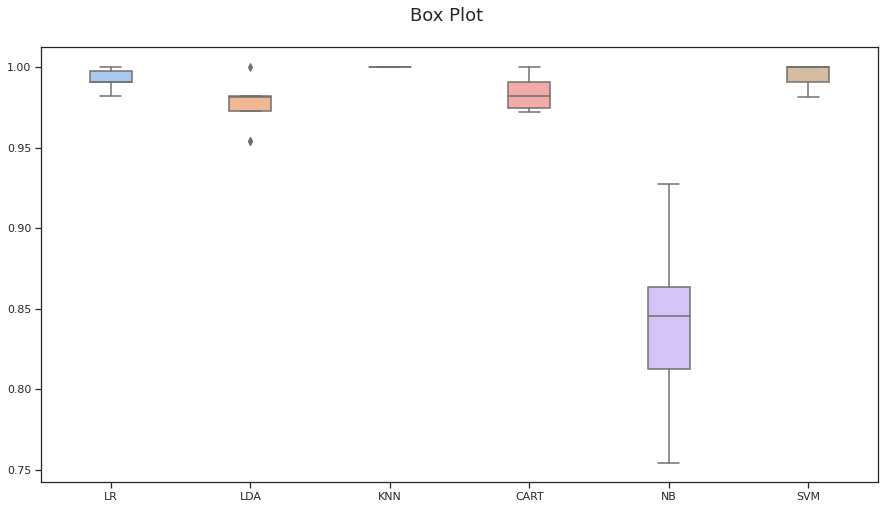

In [ ]:
sns.set(style="ticks")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.boxplot(data=results, width=0.3, palette="pastel")
plt.suptitle("Box Plot",y=0.95,fontsize=18)
ax.set_xticklabels(names)
plt.show()

#**Confusion Matrix and Classification report**

In [ ]:
#Make predictions on validation dataset using Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print("----------- Logistic Regression -----------\n")
print("Accuracy:", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:\n",confusion_matrix(Y_validation,predictions))
print("\nClassification Report:\n",classification_report(Y_validation,predictions))

----------- Logistic Regression -----------

Accuracy: 0.9854545454545455

Confusion Matrix:
 [[154   4]
 [  0 117]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       158
         1.0       0.97      1.00      0.98       117

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Area under the ROC curve - Auc: 0.999621



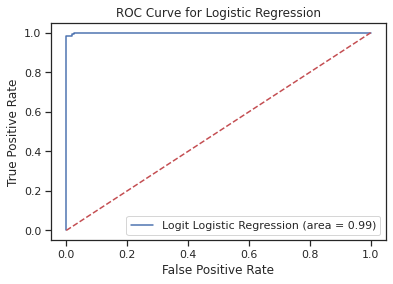

In [ ]:
# Plot ROC curve for Logistic Regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

Log_ROC_auc=roc_auc_score(Y_validation,LR.predict(X_validation))
fpr, tpr, thresold = roc_curve(Y_validation,LR.predict_proba(X_validation)[:,1])
roc_auc = auc(fpr, tpr) 
print ("Area under the ROC curve - Auc: %f\n" % roc_auc)

plt.figure()
plt.plot(fpr,trp,label="Logit Logistic Regression (area = %0.2f)" % Log_ROC_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Make predictions on validation dataset using SVM
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
print("----------- SVM -----------\n")
print("Accuracy:", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:\n",confusion_matrix(Y_validation,predictions))
print("\nClassification Report:\n",classification_report(Y_validation,predictions))


----------- SVM -----------

Accuracy: 1.0

Confusion Matrix:
 [[240   0]
 [  0 172]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       240
         1.0       1.00      1.00      1.00       172

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Area under the ROC curve - Auc: 0.999830



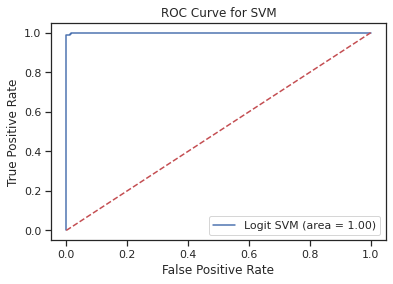

In [ ]:
# Plot ROC curve for SVM
from sklearn.metrics import roc_curve, auc

classifier = SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, Y_train).predict_proba(X_validation)

fpr, tpr, thresholds = roc_curve(Y_validation, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve - Auc: %f\n" % roc_auc)

plt.clf()
plt.plot(fpr, tpr, label='Logit SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

#**Finalizing the model with pickle**

In [ ]:
#Finalizing the model using Logistic Regression
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.35,random_state=7)

#Fit the model on 35%
model = LogisticRegression()
model.fit(X_train, Y_train)

#save the model to disk
filename = "finalized_model_lr.sav"
dump(model, open(filename,"wb"))

#load the model from disk
loaded_model = load(open(filename,"rb"))
result = loaded_model.score(X_test,Y_test)
print("Logistic Regression Accuracy = ",result*100)

Logistic Regression Accuracy =  98.96049896049897


In [ ]:
#Finalizing the model using SVM
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.35,random_state=7)

#Fit the model on 35%
model = SVC()
model.fit(X_train, Y_train)

#save the model to disk
filename = "finalized_model_svm.sav"
dump(model, open(filename,"wb"))

#load the model from disk
loaded_model = load(open(filename,"rb"))
result = loaded_model.score(X_test,Y_test)
print("SVM Accuracy = ",result*100)

SVM Accuracy =  99.16839916839916
